## TA Review - Multi-Factor Models

#### FINM 36700 - Fall 2025
#### Brian Wickman

In [ ]:
# Load packages
# Load required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
import helper_functions as pmh

import warnings
warnings.filterwarnings('ignore')

### (0) Open Midterm Preparation

#### (A) "I don't think LLMs should be used for exams, because you're not testing knowledge, you're testing how good you are at using LLMs." - me, last year
1. **Your effectiveness as a QR/ QD depends on your abilities to (1) generate ideas and (2) implement them.**
2. Coding (memorizing syntax / reading documentation) is not a skill anymore
3. Coding efficiency allow you to test more ideas, so you need to be efficient
4. **Please give some thought to your IDE/ LLM integration**. Here are free (excellent) options for UChicago students:
    * VSCode + GitHub Copilot + Google Gemini 2.5 pro (Tobias i.e. the best programmer at FinMath)
    * VS Code + Copilot (Anand)
    * [JetBrains DataSpell](https://www.jetbrains.com/dataspell/) or [JetBrains PyCharm](https://www.jetbrains.com/pycharm/) with Google Gemini 2.5 pro/ [GitHub Copilot](https://github.com/features/copilot) (Brian)

#### (B) Throughtout the semester
1. Go to the lectures and work through in-class exercises
2. Find a second source of information that frames the content differently (in order of increasing difficulty, you will understand more than you think):
    * Wikipedia articles ([link to CAPM](https://en.wikipedia.org/wiki/Capital_asset_pricing_model))
    * A Random Walk Down Wall Street (Malkiel) (*Chapter 9 for CAPM*)
    * The Elements of Quantitative Investing (Gappy Paleologo) (*Chapter 4 for LFM, prone to overcomplication and bad typesetting*)
    * Econometrics of Financial Markets (Campbell, Lo, MacKinlay) (*Chapter 5 for CAPM*)
    * Asset Pricing (Cochrane) (*Chapter 9 for Factor Pricing Models*)
    * Handbook of Financial Econometrics (Hansen, et al) (*Volume 2, Chapter 14 The Analysis of the Cross-Section of Security Returns, literature review covering recent research*)
        * Lars Peter Hansen: Operator Methods for Continuous-Time Markov Processes
        * Torben Anderson (Northwestern): Parametric and Nonparametric Volatility Measurement
        * Jeffrey Russell: Analysis of High-Frequency Data
        * Per Mykland: Option Pricing Bounds and Statistical Uncertainty
3. Complete every section of the HW for yourself
    * Use AI tools to help optimize the code
    * Make general functions that can handle different inputs (annualization of returns, different factors, etc)

#### (C) Before the midterm
1. Review HW solutions, update your code to ensure correct output
2. Complete previous exams with your optimized functions (timed)
3. Organize previous exams and HW solutions into a single class folder (preferably a Git repository)
    1. **This allows AI to reference your codebase and gives extremely accurate autocomplete!!**

#### (D) During the midterm

1. **Easiest questions (direct HW extensions) first (plot cumulative returns, calculate tangency weights)**
2. Spend time on the new applications

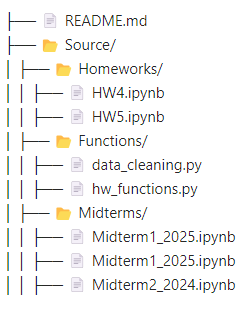

In [ ]:
display(Image(filename="pictures/folder_structure.png"))

### (1) Review of CAPM

**CAPM implies that the expected return of an asset is linearly related to its covariance with the market portfolio**

```{math}
:label: eq-capm-linear
\mathbb{E}\left[\tilde{r}^i\right] = \beta^{i,m}\mathbb{E}\left[\tilde{r}^m\right]
```

(\text{exposure to systematic risk}) $\times$ (\text{level of systematic risk})

```{math}
:label: eq-capm-beta
\beta^{i,m} = \frac{\mathrm{cov}(\tilde{r}^i, \tilde{r}^m)}{\mathrm{var}(\tilde{r}^m)}
```

Implications of CAPM (1.1):
1. To achieve higher average long-run returns, increase exposure to systematic risk (all stocks move up and down in tandem)
    1. Equivalently, no premium for bearing risk that can be diversified away (idiosyncratic risk, just hold more stocks)
2. Recent empirical evidence (including HW3!) shows that CAPM does not fully explain cross-section of expected returns
    1. Alphas in time-series regressions non-zero
    2. Alphas, $R^2$ in cross-sectional regressions are non-zero and low, respectively

3. If the CAPM were completely accurate:

| | Intercept           | $R^2$      | $\varepsilon^i$  |  $\lambda_m$ (Price of risk) |
|----------------|--------------------|-----------------|---------|-----|
| Time Series | 0    |            | | |
| Cross-Sectional | 0 |  1          | 0 | $\mathbb{E}\left[\tilde{r}^m\right]$ |

4. **Due to its empirical shortcomings, should we abandon CAPM?** No!
    1. CAPM's $\beta$ still captures a dimension of risk; investors prefer less volatility to more (proof: options exist)
    2. (*Roll's Critique:*) CAPM is untestable because the market portfolio is unobservable (domestic & foreign equities, bonds, real estate, commodities)
    3. If CAPM was that bad at pricing, it would actually be even more useful
        1. If low-beta stocks garner persistently higher returns, I would buy low-beta stocks and farm the higher return with less risk
       2. *Any theory is useful if it does better or worse than a coin flip*

**Conclusion: CAPM is effective, but we would be remiss to use it as the only predictor of long-run future returns**

### (2) Fama-French 3-Factor Model

Fama and French noticed that beta could not explain the variations in returns for portfolios formed on the intersection of value and size characteristics. In particular, firms with high book-to-market ratios and small market capitalizations demonstrated higher returns than otherwise predicted by CAPM. In response, Fama and French (1993) propose a 3-factor model that adds two factors to CAPM to better explain the cross-section of expected returns:

\begin{align*}
     \mathbb{E}\left[\tilde{r}^i\right] &= \beta^{i,m}\mathbb{E}\left[\tilde{r}^m\right] +  \beta^{i,s}\mathbb{E}\left[\tilde{r}^s\right] +  \beta^{i,\nu}\mathbb{E}\left[\tilde{r}^{\nu}\right] \tag{2.1}\\
     &= (\text{CAPM}) + (\text{Size}) + (\text{Value})
\end{align*}

where:
1. $\mathbb{E}\left[\tilde{r}^m\right]$ is the excess return of the market (same as CAPM)
2. $\tilde{r}^s$ is the return of a portfolio that goes long small stocks and shorts large stocks (liquidity premium? information uncertainty premium?)
3. $\tilde{r}^{\nu}$ is the return of a portfolio that goes long value stocks and shorts growth stocks. (less profitable, more distressed?)
    * "When a firm's market value is low relative to its book value, then a stock purchaser acquires a relatively large quantity of book assets for each dollar spent on the firm." - Case study

Important notes:
1. Fama-French (and other empirical asset pricers) had access to corporate finance, historical return data through UChicago's proprietary Center for Research and Security Prices (CRSP), which UChicago just sold to Morningstar. **Thus, the factors are calculated from accounting and return data.**
2. For more details on how the factors are constructed, see the example below! For FF factor returns time series, see [Kenneth French's website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html).
3. Fama-French value factor has a specific meaning: some ratio of accounting value to market value (variations listed below). On the contrary, Ben Graham's (author of the Intelligent Investor) value investing refers to finding companies that are underpriced relative to their company fundamentals.
    1. Book-to-market (high means strong accounting fundamentals per market-value-dollar).
    2. Market-to-book (low)
    3. Earnings-price (high, measures income generated per dollar invested in stock)
    4. Dividend-price (high, amount of money returned to investor based on the price)
4. We use returns and accounting data to calculate the factor returns ($\tilde{r}^m, \tilde{r}^s, \tilde{r}^{\nu}$). When applying the model, we regress the time series of returns on the factor returns to estimate the beta coefficients (loose interpretation: exposure to each factor).
    1. **Thus, a security's beta determines its expected return, not its accounting fundamentals!** If the security's time series of returns co-moves with the size factor, then that security's returns "behave like a small stock" and has a high size beta. But we don't care if the security is a small stock or a large stock! Equivalently, we do not input the firm's size to calculate the return!

#### (2a.1) Sample Midterm Question

Why are factor returns constructed using long-short portfolios (e.g., buying winners and shorting losers) instead of simple long-only portfolios?

1. To minimize the transaction costs associated with portfolio rebalancing.
2. To maximize the absolute return of the strategy regardless of market direction.
3. To provide a high positive correlation with inflation and other macroeconomic risks.
4. To reduce the portfolio's overall exposure to the broad market return

### (2b) Calculation of FF3 Factors

This was one of my projects at DFA this summer using 1940-1965 corporate finance data. For our intents and purposes, we use the CRSP 2013 corporate finance data (same as last week's TA review).

Here's the process for the size factor:
   1. For each stock, calculate the market capitalization (share price * number of shares outstanding)
   2. Sort all stocks by market capitalization
   3. Label the top 30\% of firms as "large", the bottom 30\% as "small", and the middle 40\% as "medium". *(Slightly different breakpoints than FF).*
   4. Group stocks by size into size portfolios (*as seen on HW4*) and calculate the mean return for each portfolio and period
   5. The size factor return is some formulation of the "small" group minus the return of the "large" group (see below)
        * This is a "long-short" portfolio that is long small stocks and short large stocks!

Now we have a time-series of factor returns!

#### (2b.1) Load and clean data

CRSP 2013 Corporate Finance Data


,BtM,Size,Return
ticker,,,
A,0.37804,1.424446e+07,0.300759
AA,1.41720,9.263314e+06,0.924233
AAON,0.29956,5.118576e+05,0.438863
AAP,0.21618,5.307885e+06,0.049137
AAPL,0.26379,9.199874e+07,0.490023


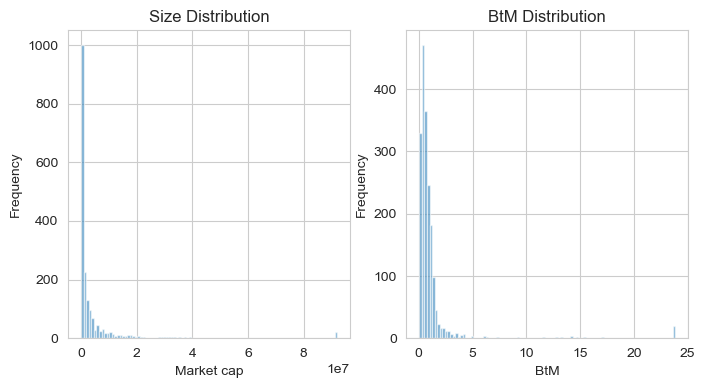

In [ ]:
## 1. Load CRSP 2013 data
# 1a. Clean data
crsp = pd.read_excel('data/crsp_corp_fin_2013.xlsx').set_index('ticker')[['B/M', 'Size', 'Return2013']]
crsp.columns = ['BtM', 'Size', 'Return']
print('CRSP 2013 Corporate Finance Data')
display(crsp.head())

# plot distirbutions of Size and BtM
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
crsp['Size'].hist(bins=100, alpha=0.6)
plt.xlabel('Market cap'); plt.ylabel('Frequency'); plt.title('Size Distribution')
plt.subplot(1, 2, 2)
crsp['BtM'].hist(bins=100, alpha=0.6)
plt.xlabel('BtM'); plt.ylabel('Frequency'); plt.title('BtM Distribution')
plt.show()

#### (2b.2) Label size, value buckets

Market cap 30%, 70% breakpoints: [230582.669, 2697548.5949999997]
Book-to-market ratio 30%, 70% breakpoints: [0.4113, 0.93301]


,BtM,Size,Return,size_bucket,value_bucket,size_value_bucket
ticker,,,,,,
A,0.37804,1.424446e+07,0.300759,Large,Growth,Large_Growth
AA,1.41720,9.263314e+06,0.924233,Large,Value,Large_Value
AAON,0.29956,5.118576e+05,0.438863,Medium,Growth,Medium_Growth
AAP,0.21618,5.307885e+06,0.049137,Large,Growth,Large_Growth
AAPL,0.26379,9.199874e+07,0.490023,Large,Growth,Large_Growth


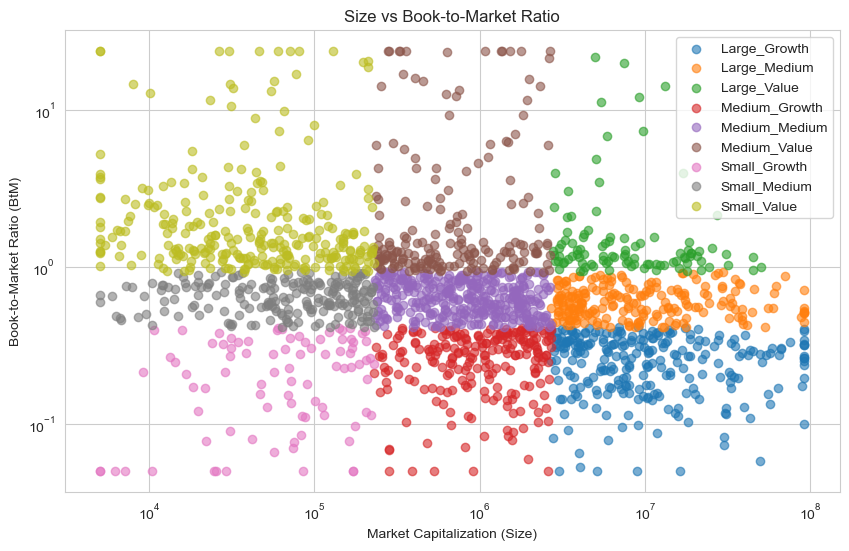

In [ ]:
## 2. Create size portfolios
# Label size, value buckets based on 30/40/30 quantiles (equal # of firms per bucket)
# print 30, 40, 30 quantiles for size
size_quantiles =  crsp['Size'].quantile([0.3, 0.7])
value_quantiles = crsp['BtM'].quantile([0.3, 0.7])
print(f'Market cap 30%, 70% breakpoints: {size_quantiles.tolist()}')
print(f'Book-to-market ratio 30%, 70% breakpoints: {value_quantiles.tolist()}')

crsp['size_bucket'] = pd.qcut(crsp['Size'], q=[0, .3, .7, 1.0], labels=['Small', 'Medium', 'Large'])
crsp['value_bucket'] = pd.qcut(crsp['BtM'], q=[0, .3, .7, 1.0], labels=['Growth', 'Medium', 'Value'])
crsp['size_value_bucket'] = crsp['size_bucket'].astype('string') + '_' + crsp['value_bucket'].astype('string') # joint buckets
crsp['size_value_bucket'] = crsp['size_value_bucket'].astype('category')
display(crsp.head())

# Plot size vs book-to-market, color points by size_value_bucket
plt.figure(figsize=(10, 6))
for label, group in crsp.groupby('size_value_bucket'):
    plt.scatter(group['Size'], group['BtM'], label=label, alpha=0.6)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Market Capitalization (Size)')
plt.ylabel('Book-to-Market Ratio (BtM)')
plt.title('Size vs Book-to-Market Ratio')
plt.legend(); plt.grid(True); plt.show()

#### (2b.3) Compare portfolio returns

Fama-French would argue that the small value portfolio should produce the highest excess returns (in the long run).

,count,mean,std,sharpe
,,,,
Small_Growth,88,0.540,0.311,1.738
Large_Medium,216,0.535,0.290,1.847
Medium_Value,191,0.516,0.284,1.817
Large_Value,100,0.501,0.306,1.640
Small_Value,287,0.499,0.304,1.643
Medium_Medium,351,0.497,0.288,1.721
Large_Growth,262,0.492,0.296,1.661
Small_Medium,203,0.490,0.285,1.722
Medium_Growth,228,0.487,0.292,1.667


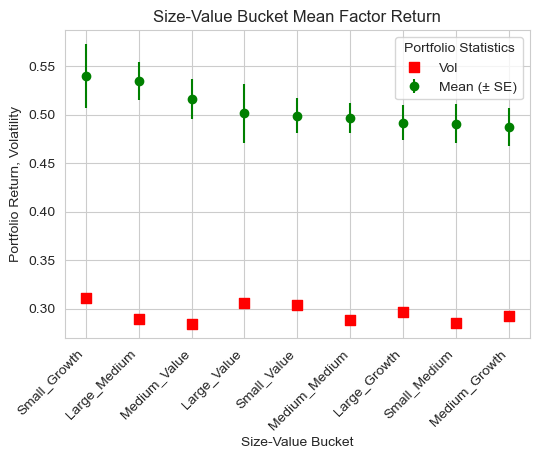

In [ ]:
# Showcase the bucket returns
factor_returns = crsp.groupby('size_value_bucket')['Return'].agg(['count', 'mean', 'std'])
factor_returns['sharpe'] = factor_returns['mean'] / factor_returns['std']
factor_returns.sort_values('mean', ascending=False, inplace=True)
factor_returns.index.name = ''
display(round(factor_returns,3))

# Calculate standard error of the mean (quantify uncertainty induced by sample size)
factor_returns['se_mean'] = factor_returns['std'] / factor_returns['count'] ** 0.5

# Which buckets offer highest mean returns in 2013?
plt.figure(figsize=(6, 4))
plt.errorbar(factor_returns.index, factor_returns['mean'], yerr=factor_returns['se_mean'], fmt='o', color = 'green', label='Mean (± SE)')
plt.scatter(factor_returns.index, factor_returns['std'], marker='s', s=60, color = 'red', label='Vol')
plt.xlabel('Size-Value Bucket'); plt.ylabel('Portfolio Return, Volatility')
plt.xticks(rotation=45, ha='right')
plt.title('Size-Value Bucket Mean Factor Return')
plt.grid(True); plt.legend(title = 'Portfolio Statistics'); plt.show()

You have seen these portfolio returns before! We priced these 5x5 portfolio sorts with the FF3 model in HW4!

1. Size portfolios: Small, ME1, ME2, ME3, Large
2. Value portfolios: LoBM, ME1, ME2, ME3, HiBM

In [ ]:
## Portfolio sorts from HW4
# Excess return summary stats
portfolios = pd.read_excel('data/dfa_analysis_data.xlsx',sheet_name='portfolios (total returns)',index_col='Date')
rfr = pd.read_excel('data/dfa_analysis_data.xlsx',sheet_name='factors',index_col='Date')['RF']

# Subset data, calculate excess returns
portfolios = portfolios.subtract(rfr,axis=0)
portfolios = portfolios.loc['1981':]
display(portfolios.head())

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.054249,-0.013893,0.003712,0.006392,0.022152,-0.057863,-0.017854,-0.010116,0.007936,0.020617,...,-0.078660,-0.044915,-0.014171,-0.004889,0.003898,-0.071780,-0.083514,-0.074557,-0.011083,0.012364
1981-02-28,-0.044800,-0.022740,0.001825,0.009678,0.012478,-0.014160,0.007415,0.014910,0.022227,0.027980,...,0.003117,0.013442,0.034223,0.005988,0.027489,0.022119,0.010130,-0.017048,0.020439,-0.015209
1981-03-31,0.061564,0.091321,0.075505,0.077941,0.060382,0.068694,0.071087,0.064654,0.063975,0.063450,...,0.077407,0.055098,0.072485,0.070515,0.065187,0.020684,0.024396,-0.007959,0.021918,0.069881
1981-04-30,0.017071,0.034543,0.024593,0.035687,0.043325,0.005458,0.025003,0.024547,0.026161,0.029433,...,-0.010456,-0.019226,-0.004609,-0.013228,0.006240,-0.041250,-0.058614,-0.037359,0.010897,-0.040524
1981-05-31,0.038553,0.040581,0.028879,0.014047,0.015229,0.050260,0.007237,0.020115,-0.009282,0.013713,...,0.022358,0.009110,0.008332,-0.003318,0.022151,0.004415,-0.033439,-0.030854,0.025971,-0.003960


#### Here's another view of the average returns and volatilities of the size-value portfolios.

Size on rows, value on columns. Each entry corresponds to the mean return of that size-value portfolio in 2013.

In [ ]:
# Create tabulated size x value sorts
portfolio_sorts = pd.DataFrame(columns = ['Value', 'Medium', 'Growth'], index = ['Small', 'Medium', 'Large'])

# Create separate labels
portfolio_rets = factor_returns[['mean']].reset_index(names = 'bucket')
portfolio_rets['Size'] = portfolio_rets['bucket'].str.split('_').str[0]
portfolio_rets['Value'] = portfolio_rets['bucket'].str.split('_').str[1]

# Populate mean return dataframe
for size, value in zip(portfolio_rets['Size'], portfolio_rets['Value']):
    portfolio_sorts.loc[size, value] = portfolio_rets.loc[(portfolio_rets['Size'] == size) & (portfolio_rets['Value'] == value), 'mean'].values[0]

# Display dataframe with heatmap for larger values
portfolio_sorts.loc[:, 'Average'] = portfolio_sorts.mean(axis = 1)
portfolio_sorts.loc['Average', :] = portfolio_sorts.mean(axis = 0)
portfolio_sorts = portfolio_sorts.style.background_gradient(cmap='RdYlGn', subset=pd.IndexSlice[['Small', 'Medium', 'Large'], ['Value','Medium', 'Growth']])
print("Portfolio sorts by size and value (2013):")
display(portfolio_sorts)

Portfolio sorts by size and value (2013):


,Value,Medium,Growth,Average
Small,0.499035,0.490485,0.539745,0.509755
Medium,0.516362,0.496514,0.487292,0.500056
Large,0.501306,0.534833,0.491841,0.509327
Average,0.505568,0.507277,0.506293,0.506379


#### (2b.4) Calculate FF3 factor returns

Check out the factor definitions (from [Ken French's website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html)) for the FF3 models and our calculated factor returns for 2013. As previously suggested, we go long small stocks and short large stocks to form the size factor (SMB: small minus big).

Note that FF use different breakpoints to form characteristic buckets and monthly portfolio returns (we used annual), so the returns will differ.

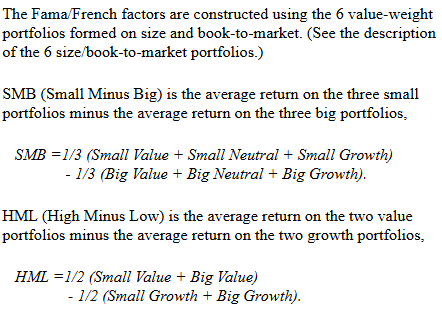

In [ ]:
display(Image(filename="pictures/ff3_factors.png"))

In [ ]:
# Calculate FF3 factor returns for 2013
portfolio_rets = factor_returns['mean']
SMB = (1/3) * (portfolio_rets['Small_Value'] + portfolio_rets['Small_Medium'] + portfolio_rets['Small_Growth']) - (1/3) * (portfolio_rets['Large_Value'] + portfolio_rets['Large_Medium'] + portfolio_rets['Large_Growth'])
HML = (1/2) * (portfolio_rets['Small_Value'] + portfolio_rets['Large_Value']) - (1/2) * (portfolio_rets['Small_Growth'] + portfolio_rets['Large_Growth'])
print(f'Factor Returns 2013:\nSMB: {SMB:.4%}\nHML: {HML:.4%}')

Factor Returns 2013:
SMB: 0.0428%
HML: -1.5623%


#### (2c) Sample Midterm Question

During 2024, more than 50% of the S&P 500's gain was attributed to seven **large, growth** tech stocks. Considering this, which of the following factors most likely performed the best during 2024?
1. Size
2. Value
3. Market
4. GDP Growth

### (3) Factor Research: Welcome to the Zoo

The fundamental problem for the buy-side is to determine which securities to invest in, with the goal of buying low and selling high. Thus, when a firm buys a security, they want the expected return to be positive, so that the price increases and they can sell for a profit. However, the expected return is unobservable, so investors use various characteristics (factors) to forecast expected returns. The goal of factor research is to find factors that are correlated with expected returns.

We have seen models for univariate returns, but these are impractical for real-world investing due to the sheer number of stocks and idiosyncratic risk is, by construction, hard to predict. Thus, we use factor models to jointly model stock returns as being generated from a few common sources of risk (factors/ risk premiums). Factor models are of the form:

$$\mathbf{r}_t = \mathbf{\alpha} + \mathbf{B} \cdot \mathbf{f}_t + \mathbf{\epsilon}_t$$

where $\mathbf{r}_t$ is the vector of asset returns at time $t$, $\mathbf{\alpha}$ is the vector of intercepts (alphas), $\mathbf{B}$ is the matrix of factor loadings (betas), $\mathbf{f}_t$ is the vector of factor returns at time $t$, and $\mathbf{\epsilon}_t$ is the vector of idiosyncratic returns at time $t$. After imposing some basic assumptions on the factors and idiosyncratic returns, we can estimate the model parameters using time-series regression.

Thus far, we have considered two factors model: (1) market factor (CAPM) and (2) Fama-French 3-factor model (market, size, value). However, there are hundreds more factors that have been proposed in the literature. Here are some examples:
1. Momentum
2. Volatility
3. Profitability
4. Investment

Check out this list of 150 factors from Dacheng Xiu's [Factor Zoo paper](https://dachxiu.chicagobooth.edu/download/ZOO.pdf)! There are a few main issues with factor research:
1. **Data snooping**: using data to guide hypothesis formation can lead to spurious findings (need theoretical motivations!)
2. **Sample selection bias**: data availability leads to certain subsets of stocks being excluded from factor model testing
    * For example, failing stocks (typically characterized by low returns and high BtM) are excluded from FF3 testing, thus the returns of high BtM (value) stocks are overstated
3. **Factor redundancy**: many factors are correlated with each other, so they do not provide independent sources of information
    * Does the proposed factor $f^{K+1}$ add to the MV frontier generated by existing factors $f^1, f^2, \ldots, f^K$?
    * Calculate factor MV frontier to determine if $f^{K+1}$ receives significant weight (another application of MV optimization!):
      $$\mathbf{w} = \mathbf{\Sigma}_f^{-1} \mathbf{\lambda}_f \frac{1}{\gamma}$$

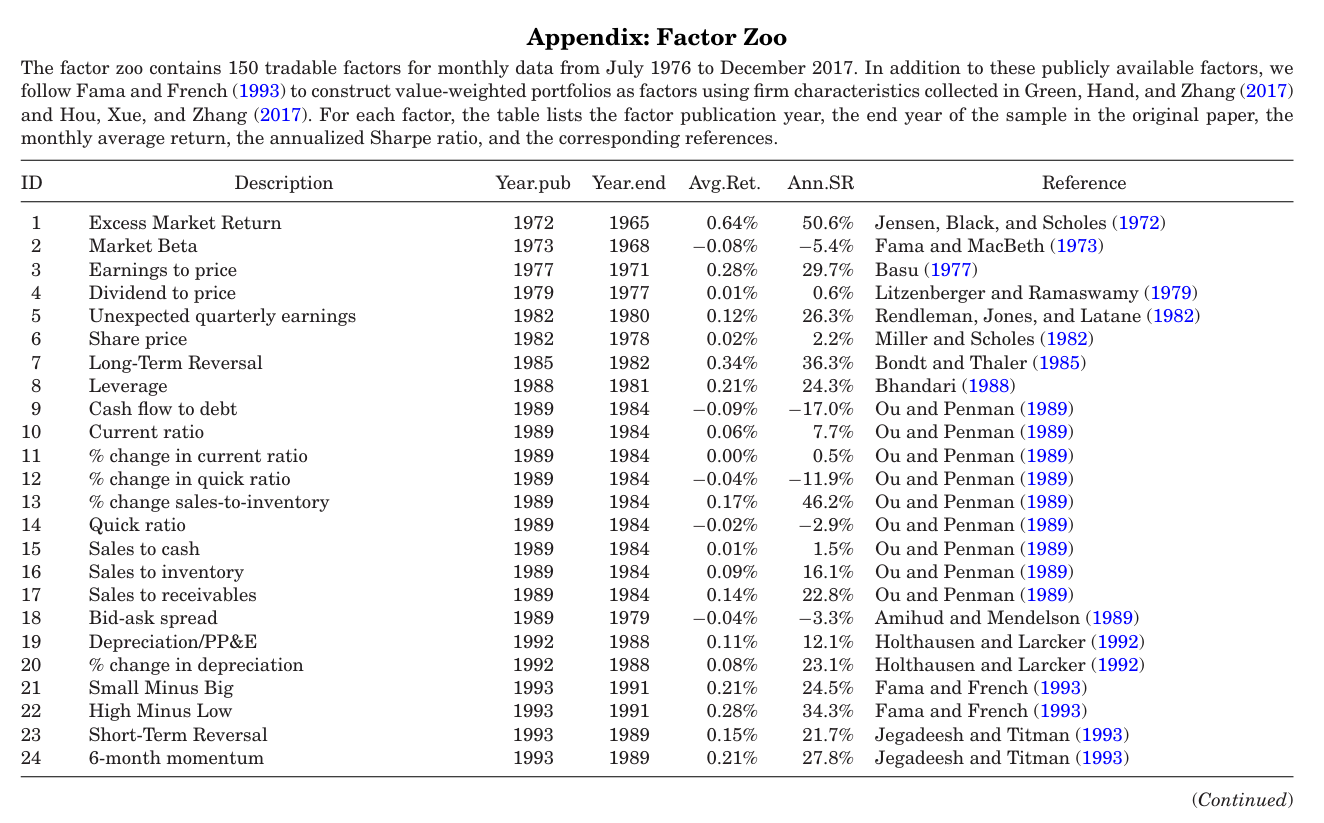

In [ ]:
display(Image(filename="pictures/factor_zoo_list.png"))

### (4.1) Momentum: Introduction

The momentum factor captures the tendency of stocks that have performed well in the past to continue performing well in the near future, and vice versa for poorly performing stocks. Possible explanations:
1. *Behavioral #1:* Underreaction to news causes prices to adjust slowly over time
2. *Behavioral #2:* Positive news pushes the price up at $t$, attracting attention and further buying, pushing the price up at $t+1$ (Overreaction)
3. *Risk-based*: Momentum strategies suffer from infrequent but severe crashes at the same time the economy peforms poorly, so the excess return is compensation for the tail risk. During recession, high beta stocks are the "losers", so when the economy recovers, you are essentially shorting the economy.

No definitive reason why it works, but it does! It is one of the most popular strategies among quant funds because it can produce uncorrelated, positive returns.

We can test for the presence of momentum using autoregression. Consider the following time-series regression:
\begin{align*}
    r_{t+1}^m &= \alpha + \beta r_t^m + \epsilon_{t+1}^m \tag{Overall market}\\
    r_{t+1}^i &= \alpha^i + \beta r_t^i + \epsilon_{t+1}^i \tag{Stock $i$}
\end{align*}

By no arbitrage, there is no clear evidence of momentum $\beta > 1$ or mean reversion $\beta < 0$ in the overall market. However, when we look at individual stocks, we find that stocks exhibit slight momentum $\beta^i \approx 0.05 > 0$ at the monthly level, which might not even be profitable after transaction costs.

### (4.1) Momentum: Case Study

Let's implement the momentum strategy using the monthly returns generated from the aforementioned process, with AR coefficient $\beta = 0.05$ and mean stock return $\mu = 0.83\%$.

$$(r_{t+1}^i -0.83\%) = 0.05 (r_t^i-0.83\%) + \epsilon_{t+1}^i$$

Assume that the cross-section of returns for all stocks is IID and normally distributed:
$$r_t^i \sim \mathcal{N}(0.83\%, 11.5\%)$$

Let's generate 1000 stocks over 10 years (120 months) and observe their returns. **Draw the first return from the normal distribution, which then evolves through the AR process.**

Monthly return statistics (subsample)
Average monthly returns: 0.0079
Average monthly volatility: 0.0994


,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Stock 6,Stock 7,Stock 8,Stock 9,Stock 10
Mean,-0.0030,-0.0029,0.0093,0.0210,0.0069,0.0021,0.0225,-0.0075,0.0038,0.0114
Volatility,0.0637,0.1229,0.1099,0.1093,0.0992,0.0771,0.1164,0.0891,0.0746,0.1447
Sharpe Ratio,-0.0470,-0.0239,0.0842,0.1924,0.0698,0.0273,0.1931,-0.0840,0.0515,0.0786
Min,-0.1768,-0.2649,-0.2190,-0.2548,-0.2863,-0.1957,-0.2138,-0.2079,-0.1601,-0.3204
Max,0.1406,0.2962,0.2992,0.2704,0.2609,0.2039,0.2634,0.2243,0.1801,0.3768


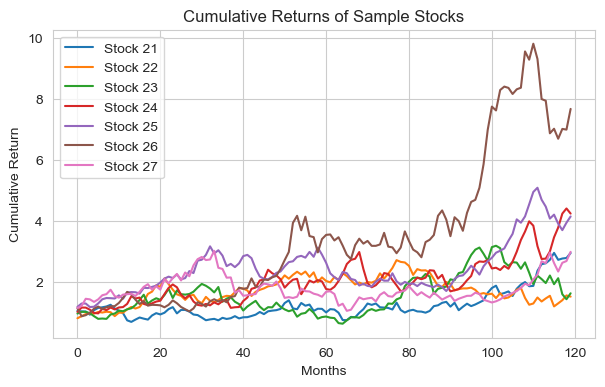

In [ ]:
##  Let's analyze 100 assets over 120 months
# 1. Set parameters, define residual variance
np.random.seed(124)
T, N = 120, 1000
autocorr, mean_return, std_return = 0.05, 0.0083, 0.115 # think of autocorr as a measure of firm skill (winners keep winning because they know how to win)
epsilon_std = np.random.uniform(low = 0.05, high = 0.15, size = N) # monthly idiosyncratic vol

# 2. Simulate return distribution
returns = np.zeros((T, N))
epsilons = np.zeros((T, N))
returns[0, :] = np.random.normal(loc=mean_return, scale=std_return, size=N) # time-0 rets from normal dist
for t in range(0, T - 1): # iterate through each period sequentially to accommodate AR proces
    for i in range(N):
        epsilons[t+1, i] = np.random.normal(loc=0, scale=epsilon_std[i]) # idiosyncratic var time-t, asset-i
        returns[t+1, i] = mean_return + autocorr * (returns[t, i] - mean_return) + epsilons[t+1, i]
returns_df = pd.DataFrame(returns, columns = ['Stock ' + str(i) for i in range(1, N+1)])

# 3. Let's check the return time series
print('Monthly return statistics (subsample)')
returns_stats = pmh.stats(returns_df, tail_risk_stats = False, annualization = 1)
print(f"Average monthly returns: {returns_stats['Mean'].mean():.4f}")
print(f"Average monthly volatility: {returns_stats['Volatility'].mean():.4f}")
display(returns_stats[:10].T)

# Plot cumulative returns for a few stocks
cumulative_returns = returns_df.apply(lambda x: (x+1).cumprod())
plt.figure(figsize=(7, 4))
for i in range(20, 27):
    plt.plot(cumulative_returns.index, cumulative_returns.iloc[:, i], label=cumulative_returns.columns[i])
plt.xlabel('Months'); plt.ylabel('Cumulative Return'); plt.title('Cumulative Returns of Sample Stocks')
plt.legend(); plt.grid(True); plt.show()

### (4.1b) Confirm AR structure in returns

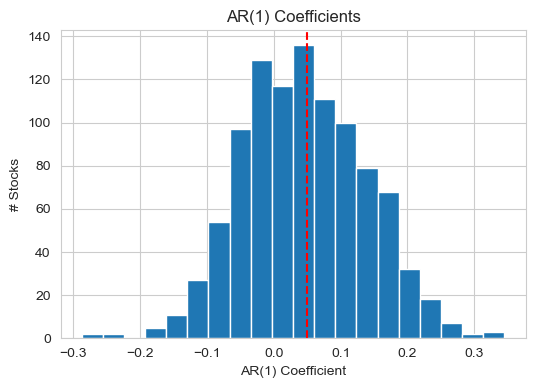

In [ ]:
# Calcualte AR(1) coefficients for each stock (should be centered at chosen AR coefficient)
ar1_coefs = returns_df.apply(lambda x: x.corr(x.shift(1))).to_numpy()
plt.figure(figsize=(6, 4))
plt.hist(ar1_coefs, bins = 20); plt.xlabel('AR(1) Coefficient'); plt.ylabel('# Stocks'); plt.title('AR(1) Coefficients')
plt.axvline(x=autocorr, color='red', linestyle='dashed'); plt.show()

### (4.2) Momentum Strategy Implementation

Two keys to taking advantage of this small autocorrelation:

1. Trade the **extreme "winners" and "losers"** (largest, smallest returns in previous period)
    - Small autocorrelation multiplied by large returns gives sizeable return in the following period.
    - By additionally shorting the biggest "losers", we can magnify this further.
2. Hold a **portfolio of many** "winners" and "losers."
    - By holding a portfolio of such stocks, diversifies the idiosyncratic risk.
    - Very small \$ R^2 \$ stat for any individual autoregression, but can play the odds (ie. rely on the small \$ R^2 \$) across 1000 stocks all at the same time.

Let's analyze the implement the following strategy:
1. **Hold a long-short portfolio of 200 stocks** with the top 10% of returns in the previous month and **short the bottom 10% of returns in the previous month.**
2. Each month, rebalance the portfolio to hold the new winners and losers (which frequently change)

Winners index (first 5 periods):
Interpretation: (1,1) entry had largest return in first period


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,Stock 664,Stock 926,Stock 285,Stock 872,Stock 379,Stock 257,Stock 194,Stock 665,Stock 187,Stock 571,...,Stock 819,Stock 82,Stock 462,Stock 297,Stock 546,Stock 289,Stock 326,Stock 690,Stock 794,Stock 188
1,Stock 923,Stock 908,Stock 325,Stock 743,Stock 748,Stock 541,Stock 449,Stock 982,Stock 488,Stock 980,...,Stock 382,Stock 120,Stock 311,Stock 581,Stock 277,Stock 352,Stock 875,Stock 24,Stock 605,Stock 233
2,Stock 998,Stock 342,Stock 489,Stock 324,Stock 655,Stock 218,Stock 914,Stock 710,Stock 812,Stock 849,...,Stock 282,Stock 85,Stock 617,Stock 62,Stock 395,Stock 584,Stock 119,Stock 202,Stock 38,Stock 506
3,Stock 731,Stock 295,Stock 683,Stock 728,Stock 108,Stock 801,Stock 127,Stock 678,Stock 2,Stock 293,...,Stock 910,Stock 247,Stock 109,Stock 267,Stock 545,Stock 889,Stock 809,Stock 499,Stock 374,Stock 876
4,Stock 667,Stock 449,Stock 447,Stock 746,Stock 213,Stock 284,Stock 754,Stock 622,Stock 87,Stock 836,...,Stock 634,Stock 166,Stock 295,Stock 423,Stock 625,Stock 851,Stock 148,Stock 788,Stock 26,Stock 777


Average monthly return of winners: 1.68%
Average monthly return of losers: -0.22%
Average MONTHLY portfolio return 1.91%


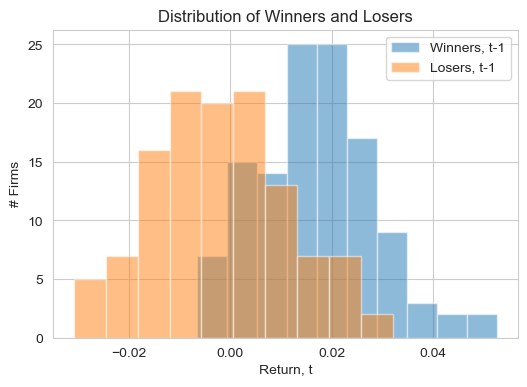

In [ ]:
## Calculate mean time t+1 return of winners, losers at time-t
# 1. For each row, (A) determine top 100, bottom 100 firms and (B) average return next period
T, num_winners = 120, 100
cols = returns_df.columns
winners_ret, losers_ret = [], []
winners_idx, losers_idx = [], [] # keep track of winners, losers for turnover analysis
for t in range(T - 1):
    row, next_row = returns_df.iloc[t], returns_df.iloc[t + 1]
    winners, losers = row.nlargest(num_winners).index, row.nsmallest(num_winners).index
    winners_idx.append(winners) # who won this period?
    losers_idx.append(losers)
    winners_ret.append(next_row[winners].mean()) # next period return of winners
    losers_ret.append(next_row[losers].mean())
bucket_perf = pd.DataFrame({'Winners': winners_ret, 'Losers': losers_ret}, index=returns_df.index[1:])
winners_idx = pd.DataFrame(winners_idx, index=returns_df.index[:-1])
losers_idx = pd.DataFrame(losers_idx, index=returns_df.index[:-1])

# Who were the biggest winners? Each row is a period, each col is return rank
print("Winners index (first 5 periods):")
print("Interpretation: (1,1) entry had largest return in first period")
display(winners_idx.head())

# 2. Calculate statistics
print(f"Average monthly return of winners: {bucket_perf['Winners'].mean():.2%}")
print(f"Average monthly return of losers: {bucket_perf['Losers'].mean():.2%}")
print(f"Average MONTHLY portfolio return {bucket_perf['Winners'].mean() - bucket_perf['Losers'].mean():.2%}")

# 3. Plot distribution of winners and losers
plt.figure(figsize=(6, 4))
plt.hist(bucket_perf['Winners'], bins=10, alpha=0.5, label='Winners, t-1')
plt.hist(bucket_perf['Losers'], bins=10, alpha=0.5, label='Losers, t-1')
plt.xlabel('Return, t'); plt.ylabel('# Firms'); plt.title('Distribution of Winners and Losers')
plt.legend(); plt.grid(True); plt.show()

### (4.3) Turnover, Trading Costs Analysis

Awesome trading strategy right? Not so fast. The biggest issue with momentum strategies is the high turnover, which leads to high trading costs that can easily wipe out profits. I calculate turnover as the percentage of stocks that leave the winners/ losers portfolio from one period to the next. For example, if 30 out of 100 winners from period $t$ are no longer winners in period $t+1$, then the turnover is 30%.

**On average, to implement this trading strategy, I would have to trade (200 * 0.85) = 170 securities each month.** There are two ways to decrease transaction costs:
1. Rebalance less frequently (quarterly, annually), but then your portfolio is not holding the true winners/ losers
2. Increase the number of winners/ losers held (top/ bottom 20%, 30%), but then the expected return decreases

Might be more practical at an institutional level with lower transaction costs and tax advantages. **Many firms including DFA, use momentum as a screen for stocks, not as a signal**. For example, DFA might avoid buying stocks that were losers in the previous month, but not necessarily buy the winners.

In [ ]:
# Calculate intersection of winners, losers between periods to determine turnover
turnover_winners, turnover_losers = [], []
for t in range(T - 2):
    # Compare subsequen rows in winners_idx and losers_idx to determine turnover
    prev_winners, curr_winners = set(winners_idx.iloc[t]), set(winners_idx.iloc[t + 1])
    prev_losers, curr_losers = set(losers_idx.iloc[t]), set(losers_idx.iloc[t + 1])

    # Turnover = 1 - (firms in top decile for both periods) / 100
    turnover_winners.append(1 - len(prev_winners.intersection(curr_winners)) / num_winners)
    turnover_losers.append(1 - len(prev_losers.intersection(curr_losers)) / num_winners)
turnover_df = pd.DataFrame({'Winners': turnover_winners, 'Losers': turnover_losers}, index=returns_df.index[1:-1])

# What % of my portfolio do I turnover each month?
display(turnover_df)
print(f"Average monthly turnover of winners: {turnover_df['Winners'].mean():.2%}")
print(f"Average monthly turnover of losers: {turnover_df['Losers'].mean():.2%}")

,Winners,Losers
1,0.89,0.88
2,0.87,0.88
3,0.81,0.77
4,0.88,0.82
5,0.80,0.82
...,...,...
114,0.91,0.89
115,0.89,0.89
116,0.83,0.86
117,0.85,0.82


Average monthly turnover of winners: 84.93%
Average monthly turnover of losers: 84.58%


### (4.4) Momentum Factor

Construct momentum factors returns from this long-short portfolio!

### (5) Arbitrage Pricing Theory (APT)

**Ross' Arbitrage Pricing Theory** gives conditions for when a Linear Factor Decomposition (risk decomposition) implies a Linear Factor Pricing Model (return prediction). Recall: LFD is a decomposition of returns into a sum of two components: (1) systematic component explained by factors and (2) idiosyncratic component unexplained by factors. LFDs make no assumptions (not even basic regression inference assumptions) and are used to calculate the size of hedging, tracking positions. Consider the following LFD that performs well (i.e. captures the systematic component of risks):

$$\tilde{r}^i_t = \mathbf{\alpha^i} + \left(\mathbf{\beta^{i,x}}\right)^T \mathbf{x}_t + \mathbf{\epsilon}_t^i$$

APT requires the following assumptions:

1. Residuals are uncorrelated across assets (diversifiable idiosyncratic risk), so that for a large portfolio, the factors completely describe return comovement (all systematic risk is captured by factors):
$$\text{corr}\left[\epsilon^i, \epsilon^j\right] = 0, \, i \neq j$$
2. There is no arbitrage. With the first assumption, this imposes $\alpha^i=0$ (no other risk premia).

Now we take expectations and arrive at a linear factor pricing model:
$$\mathbb{E}\left[\tilde{r}^i\right] = \mathbb{E}\left[\mathbf{\beta^{i,x}}\right]^T \mathbb{E}\left[\mathbf{x}\right]$$
In conclusion, if we can find a good LFD that satisfies the APT assumptions, then we can use it to price assets! The CAPM and Fama-French models are special cases of APT (require assumptions on the factors). **That being said, APT does not tell us which factors to use, so we must rely on empirical research to find good factors.**

### (6) Economic factors

Let's say we want to use macroeconomic indicators like GDP change/ bond yield changes/ unanticipated inflation as factors in our model. **How do we calculate the returns of these factors?** Like the other factors, we cannot use the long-short portfolio return as the factor returns!

1. Use the nontradeable factor realizations (i.e. YoY change in GDP) in the time series and cross-sectional regression to (1) estimate betas and (2) test the model, respectively.
2. Develop a tradeable portfolio that mimicks the nontradeable factor by regressing the nontradeable factor on available security returns. Implicit assumption is that the relationship between nontradeable factor and replicating portfolio is robust OOS.

Economic factors more popular in academia than practice.

### (7) Sample Midterm Question
If there are only two investors in the economy what is the maximum number of investors that can invest in long-short factors (size/ value/momentum) versus the maximum number that can invest in the market factor?

1. Long-Short: 2, Market: 2
2. Long-Short: 2, Market: 1
3. Long-Short: 1, Market: 2
4. Long-Short: 1, Market: 1